   ## P2M : Recommendation System For Baccalaureat Students

In [556]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [557]:
df = pd.read_csv("P2MUpdated.csv")
pd.set_option('display.max_columns', None)
del df['Horodateur']

## Nominal Encoding

In [558]:
def catToNum(df,variable):
    classes = [1,0,2]
    RealClasses = list(df[variable].unique())
    RealClasses.sort()
    for i in range(3):
        df[variable] = np.where(df[variable]==RealClasses[i],classes[i],df[variable])

In [559]:
## Lettres & langues OU Sc. Humaines-----> 1
## Sc. Juridiques -----> 2
## Médias -----> 3
## Arts et métiers -----> 4
## Médicale -----> 5
## Gestion et sc. Économiques -----> 6
## Sc. Fondamentales -----> 7
## Agriculture & environnement -----> 8
## Etudes ingénieurs & architech OU Etudes techno-----> 9

In [560]:
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Lettres & langues',0,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Sc. Humaines',1,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Médias',2,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Sc. Juridiques',3,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Arts et métiers',4,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Médicale',5,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Gestion et sc. Économiques',6,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Sc. Fondamentales',7,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Agriculture & environnement',8,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Etudes techno',9,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Etudes ingénieurs & architech',9,df['Quel est ton parcours académique ?'])

## Ordinal Encoding

In [561]:
## 'Combiens de livres as tu  lu les 6 derniers mois?' 
## <2 ----> 0
## 2 à 4 -----> 1
## >4 -----> 2
variable = 'Combiens de livres as tu  lu les 6 derniers mois?'
catToNum(df,variable)

In [562]:
##'Combiens de pages as tu écrites?'
##<5 ----> 0
##5 à 10 -----> 1
##>10 ----->2
catToNum(df,'Combiens de pages as tu écrites?')

In [563]:
## 'As tu fait des tentatives de poésie?'
## Non ----> 0
## 1 à 2 -----> 1
## >2 -----> 2
variable = 'As tu fait des tentatives de poésie?'
df[variable] = np.where(df[variable]=='Non','<2',df[variable])
catToNum(df,'As tu fait des tentatives de poésie?')

In [564]:
## 'Lis tu des livres d'histoire?'
## Non ----> 0
## 1 à 3 ----> 1
## >3 ----> 2
variable = "Lis tu  des livres d'histoire?"
df[variable] = np.where(df[variable]=='Non','<1',df[variable])
catToNum(df,"Lis tu  des livres d'histoire?")

In [565]:
def catToNum2(df,variable,l):
    ## Pas du tout -----> 0
    ## Moyennement ------> 1
    ## Oui Parfaitement ou Beaucoup------> 2
    classes = [0,1,2]
    RealClasses = ['Pas du tout', 'Moyennement', l]
    for i in range(3):
        df[variable] = np.where(df[variable]==RealClasses[i],classes[i],df[variable])

In [566]:
L2 = []
L1 = []
RealClasses = ['Pas du tout', 'Moyennement', 'Oui parfaitement']
for i in df.columns:
    aux = df[i].unique()
    if 'Pas du tout' in aux:
        
            if 'Beaucoup' in aux:
                L1.append(i)
            else:
                L2.append(i)
print(L1)

['Dans ton travail, tu préfères, une activité artistique', 'Dans ton travail, tu aimes créer, inventer …', "Ce qu'il t'attire le plus, faire preuve d'endurance.", 'Tu est du type qui aime travailler la terre.', "Tu est du type qui aime s'occuper des animaux."]


In [567]:
for variable in L1:
    catToNum2(df,variable,'Beaucoup')

In [568]:
for variable in L2:
    catToNum2(df,variable,'Oui parfaitement')

In [569]:
## 'Combiens de journaux par semaine tu lis?'
## <3 ----> 0
## 3 à 7 -----> 1
## >7 ------->2
variable = 'Combiens de journaux par semaine tu lis?'
catToNum(df,variable)

In [570]:
##Dans le présent gouvernement: combien de ministres peux tu identifier?
## <5 ----> 0
## >5 ----> 1
## Tous ----> 2
variable = "Dans le présent gouvernement: combien de ministres peux tu identifier?"
df[variable] = np.where(df[variable]=='Tous',2,df[variable])
df[variable] = np.where(df[variable]=='<5',0,df[variable])
df[variable] = np.where(df[variable]=='>5',1,df[variable])

In [571]:
## 'Votre moyenne des sciences naturelles en 3eme annee secondaire'
## <10 ----> 0
## 10 à 15 ----> 1
## >15 ----> 2
variable ='Votre moyenne des sciences naturelles en 3eme annee secondaire'
df[variable] = np.where(df[variable]=='>15',2,df[variable])
df[variable] = np.where(df[variable]=='<10',0,df[variable])
df[variable] = np.where(df[variable]=='10 à 15',1,df[variable])

In [572]:
##'Est-ce tu veux te consacrer aux autres?'
## Pas de tout ----> 0
## Un Peu ------> 1 
## Oui souvent ----> 2
variable = 'Est-ce tu veux te consacrer aux autres?'
df[variable] = np.where(df[variable]=='Un peu',1,df[variable])
df[variable] = np.where(df[variable]=='Oui souvent',2,df[variable])

## Handling Missing Values 

In [573]:
df.isnull().sum()[df.isnull().sum()!=0]

Votre Réaction face à une nouvelle?                                           1
Est-ce tu veux te consacrer aux autres?                                       1
Est-ce tu as choisi les math comme option?                                   22
Dans ton travail, tu aimes créer, inventer …                                  1
Votre moyenne des sciences naturelles en 3eme annee secondaire                2
Je trouve du plaisir à travailler les mathématiques                           1
Ce qu'il t'attire le plus, les sciences fondamentales (math, physiques…).     1
Ce qu'il t'attire le plus, utiliser des outils ou des instruments.            1
Ce qu'il t'attire le plus, réaliser des projets.                              1
Tu est du type qui aime travailler la terre.                                  2
Tu est du type qui aime s'occuper des animaux.                                2
dtype: int64

In [574]:
del df['Est-ce tu as choisi les math comme option?']
## Most fréquent values technique
for i in df.columns:
    df[i] = np.where(df[i].isnull(),df[i].value_counts().index[[df[i].value_counts().argmax()]][0],df[i])

## One Hot encoding for nominal variables

In [575]:
import category_encoders as ce
#Create object for one-hot encoding
L= ['As tu  visité un monument historique?',"Comment exprimes tu  tes idées et tes émotions?",'Joues tu le scrable?','Votre Réaction face à une nouvelle?',"Est-ce que  tu joues à l'echec?",'Devant une décision:',"Lors d'un discours:","Lors d'une discussion?",'Dans ton travail, tu préfères:']#'Est-ce tu as choisi les math comme option?']  
encoder=ce.OneHotEncoder(cols=L,handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df)
data_encoded



,Quel est ton parcours académique ?,Combiens de livres as tu lu les 6 derniers mois?,Comment exprimes tu tes idées et tes émotions?_Réaction verbale,Comment exprimes tu tes idées et tes émotions?_Réaction physique,Comment exprimes tu tes idées et tes émotions?_Ecrire,Combiens de pages as tu écrites?,As tu fait des tentatives de poésie?,Joues tu le scrable?_Non,Joues tu le scrable?_Parfois,Joues tu le scrable?_Souvent,As tu visité un monument historique?_Oui,As tu visité un monument historique?_Non,Lis tu des livres d'histoire?,Votre Réaction face à une nouvelle?_Admettre,Votre Réaction face à une nouvelle?_Mettre en question,Votre Réaction face à une nouvelle?_Négliger,Combiens de journaux par semaine tu lis?,Dans le présent gouvernement: combien de ministres peux tu identifier?,Devant une décision:_Tu prends la décision tout seul indépendamment des autres,"Devant une décision:_Discuter ton point de vue, puis décider",Devant une décision:_Laisser les autres décider à ta place,Lors d'un discours:_Tu sais séduire les autres,Lors d'un discours:_Tu n'aimes pas te dévoiler devant les autres,Lors d'un discours:_Tu t'exprimes mais timidement,Lors d'une discussion?_Tu participes et tu acceptes changer tes idées?,Lors d'une discussion?_Tu participes et tu tiens à tes idées?,Lors d'une discussion?_Tu ne participes pas et tu préfères garder tes idées à toi?,Est-ce tu veux te consacrer aux autres?,Est-ce que tu joues à l'echec?_Non,Est-ce que tu joues à l'echec?_Rarement,Est-ce que tu joues à l'echec?_Oui souvent,"Dans ton travail, tu préfères:_L'essentiel un travail peu fatiguant","Dans ton travail, tu préfères:_Un travail actif","Dans ton travail, tu préfères:_Un tarvail de bureau","Dans ton travail, tu préfères, une activité artistique","Dans ton travail, tu aimes créer, inventer …","En cas de stress, je garde la tête froide",Je repère facilement les petits défauts,Tu es du genre à répondre aux besoins des autres,Votre moyenne des sciences naturelles en 3eme annee secondaire,Je me sens à l'aise en travaillant en équipe,Je trouve du plaisir à travailler les mathématiques,"Ce qu'il t'attire le plus, les sciences fondamentales (math, physiques…).","Ce qu'il t'attire le plus, transmettre tes connaissances aux autres.","Ce qu'il t'attire le plus, travailler avec tes mains.","Ce qu'il t'attire le plus, utiliser des outils ou des instruments.","Ce qu'il t'attire le plus, mettre en application tes connaissances théoriques.","Ce qu'il t'attire le plus, réaliser des projets.","Pour toi, le travail en équipe, est une obligation","Ce qu'il t'attire le plus, faire preuve d'endurance.",Tu est du type qui aime travailler la terre.,Tu est du type qui aime s'occuper des animaux.
0,0,1,1.0,0.0,0.0,0,2,1.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,1,1,2,0,0,1,1,1,0,0,0,1,1,2,0,1
1,7,1,1.0,0.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0,1,2,2,1,2,2,1,2,1,0,1,2,2,1,1,0,2
2,8,0,0.0,1.0,0.0,0,0,0.0,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0,1,1,2,1,1,1,0,0,1,2,2,2,1,1,2,2,2
3,2,1,0.0,0.0,1.0,2,2,1.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,2,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0,1,2,1,1,0,2,0,1,2,1,1,1,2,2,2,0,0
4,4,0,0.0,0.0,1.0,1,1,0.0,1.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,2,2,0,2,1,1,2,1,0,2,2,2,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0,2,1.0,0.0,0.0,2,1,1.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0,2,1,0,0,0,0,1,0,0,0,0,1,2,1,1
121,9,0,0.0,1.0,0.0,0,0,0.0,1.0,0.0,1.0,0.0,1,0.0,0.0,1.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,0.0,0.0,1.0,0.0,0,2,2,2,1,1,

## Correlation Matrix

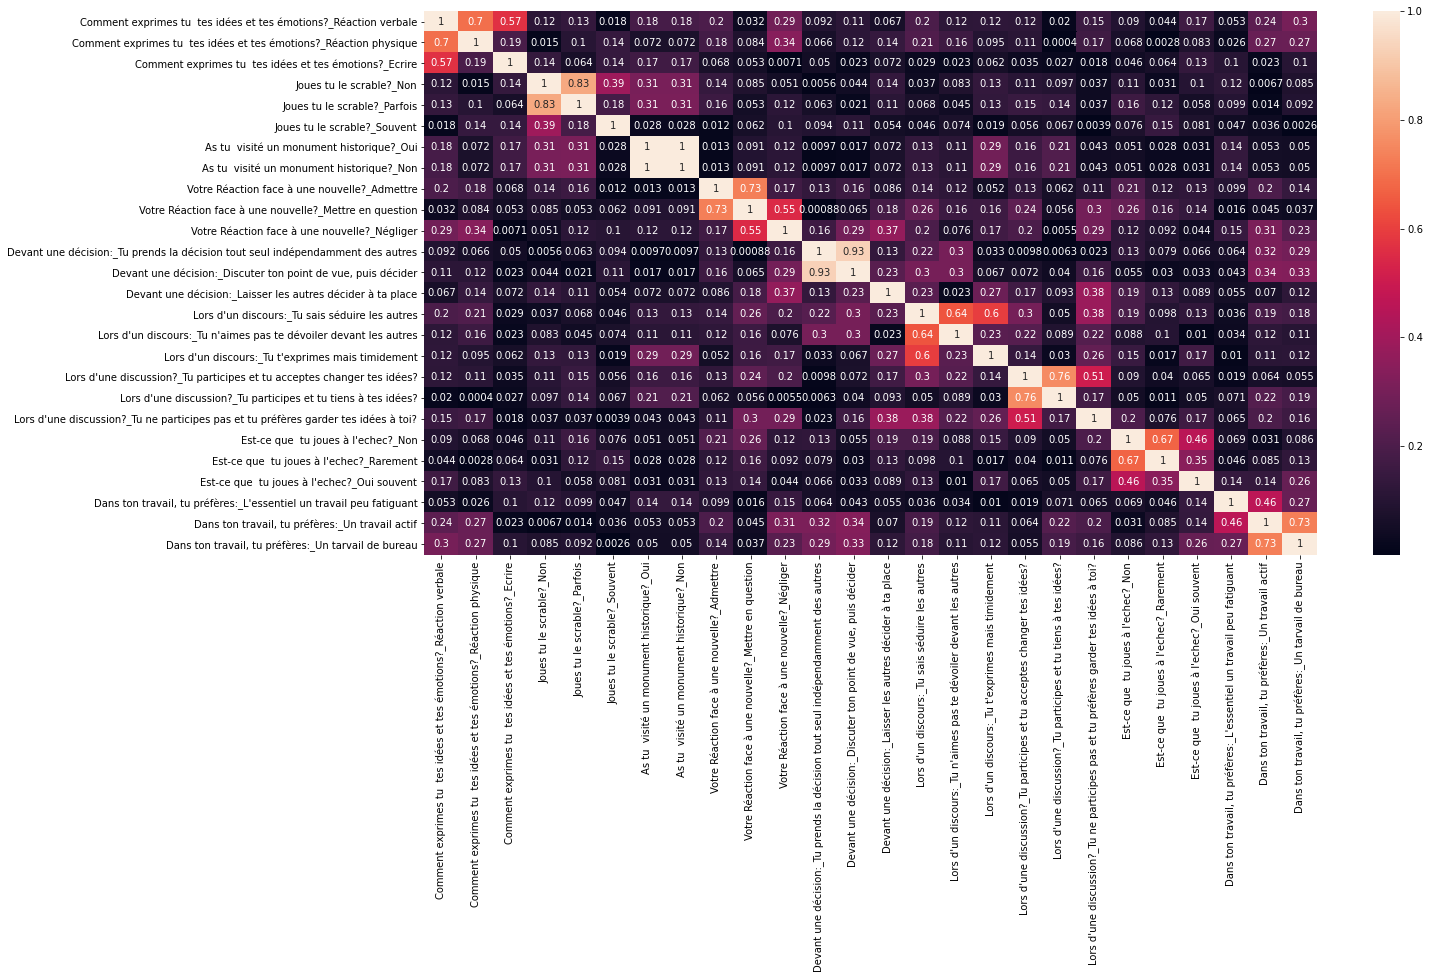

In [576]:
plt.figure(figsize=(20,10))
correlation_matrix=data_encoded.corr()
sns.heatmap(correlation_matrix.abs(), annot=True)

In [577]:
correlated_features=[]
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.73:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)


In [578]:
data_encoded.drop(correlated_features, axis='columns', inplace=True)
data_encoded.shape

(125, 46)

In [579]:
data_encoded

,Quel est ton parcours académique ?,Combiens de livres as tu lu les 6 derniers mois?,Comment exprimes tu tes idées et tes émotions?_Réaction verbale,Comment exprimes tu tes idées et tes émotions?_Réaction physique,Comment exprimes tu tes idées et tes émotions?_Ecrire,Combiens de pages as tu écrites?,As tu fait des tentatives de poésie?,Joues tu le scrable?_Non,Joues tu le scrable?_Souvent,As tu visité un monument historique?_Oui,Lis tu des livres d'histoire?,Votre Réaction face à une nouvelle?_Admettre,Votre Réaction face à une nouvelle?_Négliger,Combiens de journaux par semaine tu lis?,Dans le présent gouvernement: combien de ministres peux tu identifier?,Devant une décision:_Tu prends la décision tout seul indépendamment des autres,Devant une décision:_Laisser les autres décider à ta place,Lors d'un discours:_Tu sais séduire les autres,Lors d'un discours:_Tu n'aimes pas te dévoiler devant les autres,Lors d'un discours:_Tu t'exprimes mais timidement,Lors d'une discussion?_Tu participes et tu acceptes changer tes idées?,Lors d'une discussion?_Tu ne participes pas et tu préfères garder tes idées à toi?,Est-ce tu veux te consacrer aux autres?,Est-ce que tu joues à l'echec?_Non,Est-ce que tu joues à l'echec?_Rarement,Est-ce que tu joues à l'echec?_Oui souvent,"Dans ton travail, tu préfères:_L'essentiel un travail peu fatiguant","Dans ton travail, tu préfères:_Un travail actif","Dans ton travail, tu préfères, une activité artistique","Dans ton travail, tu aimes créer, inventer …","En cas de stress, je garde la tête froide",Je repère facilement les petits défauts,Tu es du genre à répondre aux besoins des autres,Votre moyenne des sciences naturelles en 3eme annee secondaire,Je me sens à l'aise en travaillant en équipe,Je trouve du plaisir à travailler les mathématiques,"Ce qu'il t'attire le plus, les sciences fondamentales (math, physiques…).","Ce qu'il t'attire le plus, transmettre tes connaissances aux autres.","Ce qu'il t'attire le plus, travailler avec tes mains.","Ce qu'il t'attire le plus, utiliser des outils ou des instruments.","Ce qu'il t'attire le plus, mettre en application tes connaissances théoriques.","Ce qu'il t'attire le plus, réaliser des projets.","Pour toi, le travail en équipe, est une obligation","Ce qu'il t'attire le plus, faire preuve d'endurance.",Tu est du type qui aime travailler la terre.,Tu est du type qui aime s'occuper des animaux.
0,0,1,1.0,0.0,0.0,0,2,1.0,0.0,1.0,2,1.0,0.0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1.0,0.0,0.0,1.0,0.0,1,0,1,1,2,0,0,1,1,1,0,0,0,1,1,2,0,1
1,7,1,1.0,0.0,0.0,0,0,1.0,0.0,1.0,1,0.0,0.0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0,1,2,2,1,2,2,1,2,1,0,1,2,2,1,1,0,2
2,8,0,0.0,1.0,0.0,0,0,0.0,0.0,1.0,1,0.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0,1,1,2,1,1,1,0,0,1,2,2,2,1,1,2,2,2
3,2,1,0.0,0.0,1.0,2,2,1.0,0.0,0.0,0,0.0,0.0,2,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0.0,1.0,0.0,0,1,2,1,1,0,2,0,1,2,1,1,1,2,2,2,0,0
4,4,0,0.0,0.0,1.0,1,1,0.0,0.0,0.0,1,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,1.0,0.0,0.0,0.0,1.0,2,2,0,2,1,1,2,1,0,2,2,2,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0,2,1.0,0.0,0.0,2,1,1.0,0.0,1.0,2,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,1,1,0,2,1,0,0,0,0,1,0,0,0,0,1,2,1,1
121,9,0,0.0,1.0,0.0,0,0,0.0,0.0,1.0,1,0.0,1.0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,1.0,0,2,2,2,1,1,2,2,2,1,1,1,2,2,1,0,0,2
122,6,0,1.0,0.0,0.0,0,0,1.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0,0,1,2,2,0,2,2,1,2,1,2,2,2,1,2,0,0
123,4,0,1.0,0.0,0.0,0,1,0.0,0.0,1.0,1,0.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,1.0,2,2,2,2,2,1,2,1,0,2,2,2,2,2,2,1,0,2


## DataFrame To Array

In [580]:
X = data_encoded.iloc[:,1:].values
y = data_encoded.iloc[:,0].values
X=X.astype('int')
y=y.astype('int')

## Dataset balacing

Text(0.5, 1.0, 'Quel est ton parcours académique ?')

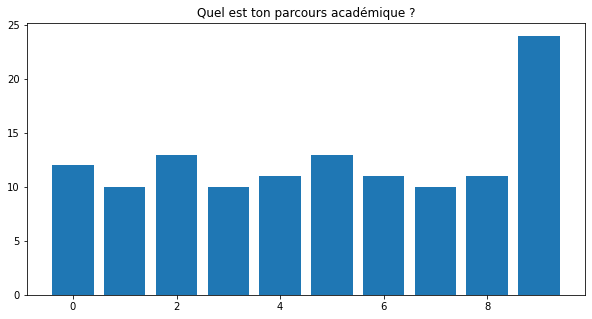

In [581]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
target = data_encoded['Quel est ton parcours académique ?'].value_counts()
ax.bar(target.index, target)
ax.set_title('Quel est ton parcours académique ?')

In [582]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
newdf = pd.DataFrame(columns=['Quel est ton parcours académique ?'],data=y[:])


Text(0.5, 1.0, 'Quel est ton parcours académique ?')

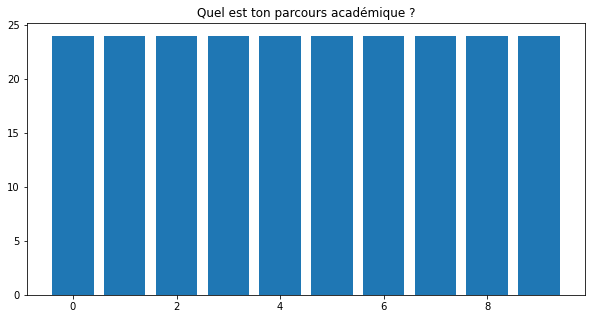

In [583]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
target = newdf['Quel est ton parcours académique ?'].value_counts()
ax.bar(target.index, target)
ax.set_title('Quel est ton parcours académique ?')

## Features Selection 

#### Using Chi-Squared Features

In [584]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
def select_features(Xtrain, ytrain, Xtest,i):
    fs = SelectKBest(score_func=chi2, k=i)
    fs.fit(Xtrain, ytrain)
    Xtrain_fs = fs.transform(Xtrain)
    Xtest_fs = fs.transform(Xtest)
    return Xtrain_fs, Xtest_fs, fs

## SVM

In [585]:
def SVM(Xtrain_fs,ytrain,Xtest_fs):
    from sklearn import svm
    clf = svm.SVC(kernel='linear') # Linear Kernel
    clf.fit(Xtrain_fs, ytrain)
    ypred = clf.predict(Xtest_fs)
    return ypred

## Multi-layer Perceptron (MLP)

In [586]:
def MLP(Xtrain_fs,ytrain,Xtest_fs):
    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50,), random_state=1)
    clf.fit(Xtrain_fs, ytrain)
    ypred = clf.predict(Xtest_fs)
    return ypred

## Logistic Regression

In [587]:
def LR(Xtrain_fs,ytrain,Xtest_fs):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    lr = LogisticRegression(random_state=1,max_iter=1000)
    lr.fit(Xtrain_fs, ytrain)
    ypred = lr.predict(Xtest_fs)
    return ypred

## Fusion Algorithm

In [588]:
def final_model(Xtrain_fs, ytrain, Xtest_fs):
    y1 = np.array(LR(Xtrain_fs,ytrain,Xtest_fs))
    y2 = np.array(SVM(Xtrain_fs,ytrain,Xtest_fs))
    y3 = np.array(MLP(Xtrain_fs,ytrain,Xtest_fs))
    
    ypred = np.zeros(y1.shape)
    ypred = np.where(y1==y2,y1,y3)
    ypred = np.where(ypred==y2,ypred,y3)
    ypred = np.where(ypred==y1,ypred,y3)
    
    return ypred

# Model Validation 

## Random Sampling : 

In [589]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
#kf = KFold(n_splits=10, random_state=2, shuffle=True) 
#rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=17)
m1,m2,m3,m4 = 0,0,0,0
i=0

score = pd.DataFrame(columns=['Fusion','MLP','SVM','LR'])

for i in range(100):
    Xtrain, Xtest,ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=i)
    Xtrain_fs, Xtest_fs, fs = select_features(Xtrain, ytrain, Xtest,'all')
    
    ypredfusion=final_model(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredmlp=MLP(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredsvm=SVM(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredlr=LR(Xtrain_fs, ytrain, Xtest_fs)
    
    
    i+=1
    
    score.loc[i-1] = [metrics.accuracy_score(ypredfusion, ytest),metrics.accuracy_score(ypredmlp, ytest),metrics.accuracy_score(ypredsvm, ytest),metrics.accuracy_score(ypredlr, ytest)]
    
#print(m1/i)
# MLP,KNN,LR

In [590]:
score.describe()

,Fusion,MLP,SVM,LR
count,100.000000,100.000000,100.00000,100.000000
mean,0.922875,0.909875,0.91075,0.904875
std,0.036758,0.040759,0.03748,0.036014
min,0.812500,0.787500,0.80000,0.800000
25%,0.900000,0.887500,0.88750,0.887500
50%,0.925000,0.912500,0.91250,0.900000
75%,0.950000,0.937500,0.93750,0.925000
max,0.987500,0.987500,0.97500,0.975000


## Leave one out

In [591]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
cv.split(X)
for train_ix, test_ix in cv.split(X):
    Xtrain, Xtest = X[train_ix, :], X[test_ix, :]
    ytrain, ytest = y[train_ix], y[test_ix]
    Xtrain_fs, Xtest_fs, fs = select_features(Xtrain, ytrain, Xtest,'all')
    
    ypredfusion=final_model(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredmlp=MLP(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredsvm=SVM(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredlr=LR(Xtrain_fs, ytrain, Xtest_fs)
    
    
    i+=1
    score.loc[i-1] = [metrics.accuracy_score(ypredfusion, ytest),metrics.accuracy_score(ypredmlp, ytest),metrics.accuracy_score(ypredsvm, ytest),metrics.accuracy_score(ypredlr, ytest)]

In [592]:
score.describe()

,Fusion,MLP,SVM,LR
count,340.000000,340.000000,340.000000,340.000000
mean,0.953787,0.944081,0.935515,0.927904
std,0.153643,0.171007,0.192191,0.205141
min,0.000000,0.000000,0.000000,0.000000
25%,0.950000,0.937500,0.937500,0.925000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


## RepeatedKFold cross validation 

In [593]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
kf = KFold(n_splits=10, random_state=2, shuffle=True) 
rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=17)
m1,m2,m3,m4 = 0,0,0,0
i=0

score = pd.DataFrame(columns=['Fusion','MLP','SVM','LR'])

for train_index, test_index in rkf.split(X):
    Xtrain, Xtest = X[train_index], X[test_index] 
    ytrain, ytest = y[train_index], y[test_index]
    Xtrain_fs, Xtest_fs, fs = select_features(Xtrain, ytrain, Xtest,'all')
    
    ypredfusion=final_model(Xtrain_fs, ytrain, Xtest_fs)
    m1+=metrics.accuracy_score(ypredfusion, ytest)
    
    ypredknn=MLP(Xtrain_fs, ytrain, Xtest_fs)
    m2+=metrics.accuracy_score(ypredknn, ytest)
    
    ypredsvm=SVM(Xtrain_fs, ytrain, Xtest_fs)
    m3+=metrics.accuracy_score(ypredsvm, ytest)
    
    ypredlr=LR(Xtrain_fs, ytrain, Xtest_fs)
    m4+=metrics.accuracy_score(ypredlr, ytest)
    
    i+=1
    score.loc[i-1] = [metrics.accuracy_score(ypredfusion, ytest),metrics.accuracy_score(ypredknn, ytest),metrics.accuracy_score(ypredsvm, ytest),metrics.accuracy_score(ypredlr, ytest)]
#print(m1/i)
# MLP,KNN,LR

In [594]:
score.describe()

,Fusion,MLP,SVM,LR
count,30.000000,30.000000,30.000000,30.000000
mean,0.931250,0.921250,0.920000,0.913333
std,0.032121,0.041151,0.031928,0.032486
min,0.850000,0.825000,0.862500,0.837500
25%,0.912500,0.903125,0.900000,0.890625
50%,0.937500,0.931250,0.925000,0.925000
75%,0.950000,0.950000,0.946875,0.937500
max,0.987500,0.975000,0.987500,0.962500


In [595]:
score[score['Fusion']<0.9].count()['Fusion']*100/float(len(score))

10.0

In [596]:
score[score['MLP']<0.9].count()['MLP']*100/float(len(score))

23.333333333333332

In [597]:
score[score['LR']<0.9].count()['LR']*100/float(len(score))

26.666666666666668

In [598]:
score[score['SVM']<0.9].count()['SVM']*100/float(len(score))

20.0

In [599]:
score.mean()

Fusion    0.931250
MLP       0.921250
SVM       0.920000
LR        0.913333
dtype: float64

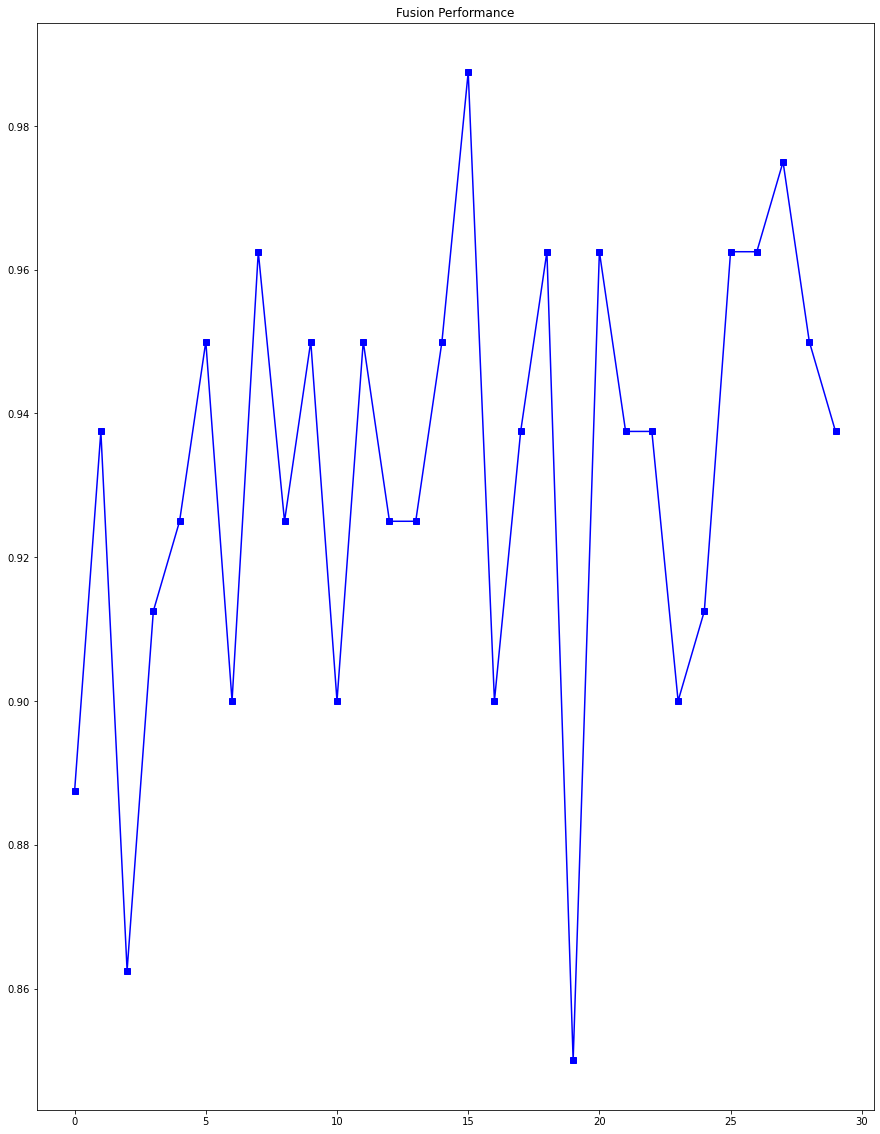

In [600]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 20
fig = plt.figure()

plt.plot(score.index,score['Fusion'], c='b', marker="s", label='first')
plt.title('Fusion Performance')
plt.show()


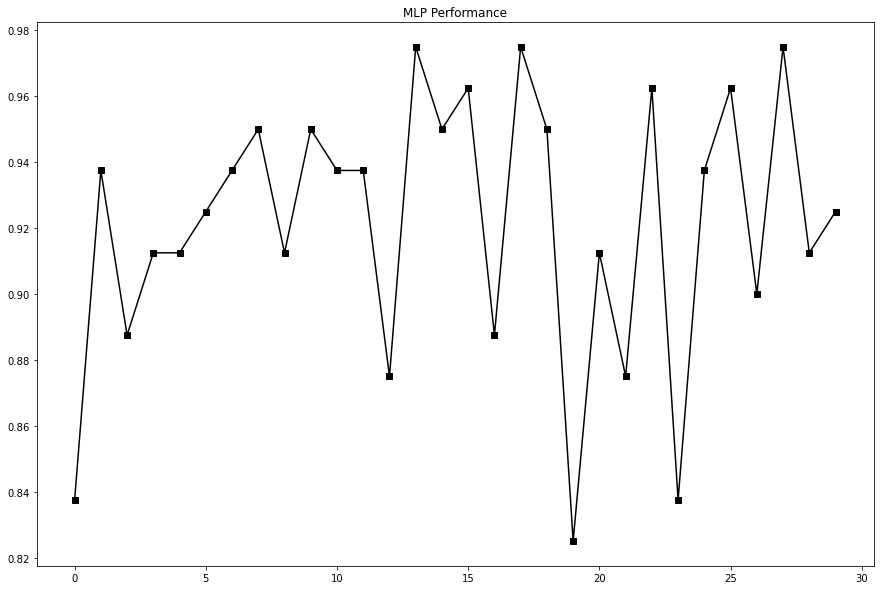

In [601]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
fig = plt.figure()

plt.plot(score.index,score['MLP'], c='k', marker="s", label='first')
plt.title('MLP Performance')
plt.show()

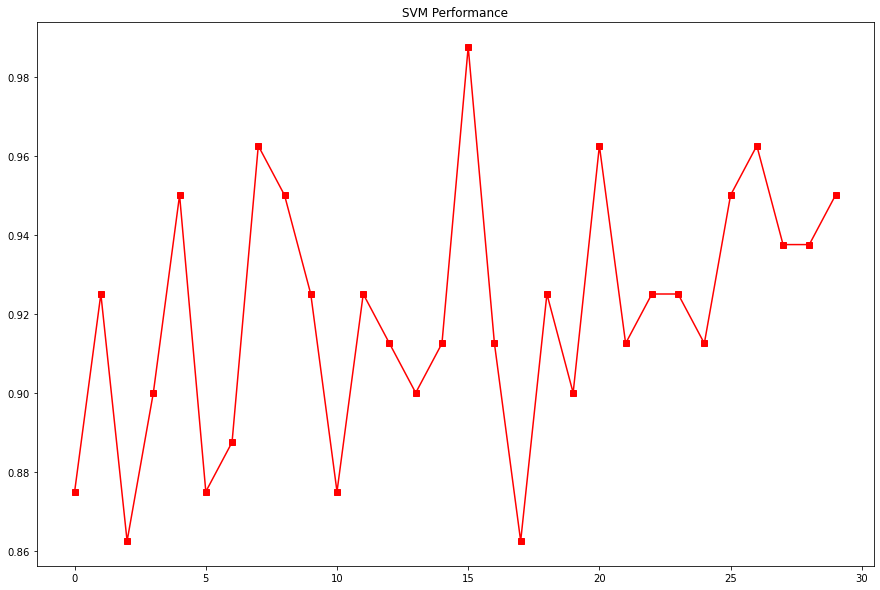

In [602]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
fig = plt.figure()

plt.plot(score.index,score['SVM'], c='r', marker="s", label='first')
plt.title('SVM Performance')
plt.show()

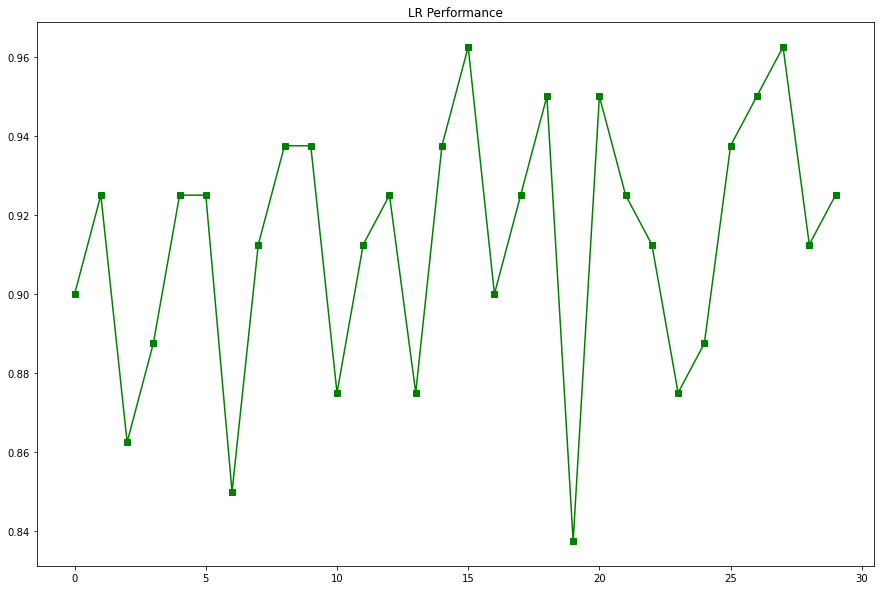

In [603]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
fig = plt.figure()

plt.plot(score.index,score['LR'], c='g', marker="s", label='first')
plt.title('LR Performance')
plt.show()